In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
raw_data = pd.read_csv('./data/online-test-dataset.csv')
print('Number of rows:', len(raw_data))
raw_data.head()

Number of rows: 858220


,date,store,item,sales
0,1/1/13,1,1,13.0
1,1/2/13,1,1,11.0
2,1/3/13,1,1,14.0
3,1/4/13,1,1,13.0
4,1/5/13,1,1,10.0


## EDA

In [6]:
df = raw_data.copy()

In [7]:
df.describe()

,store,item,sales
count,858220.000000,858220.000000,848302.000000
mean,5.500000,24.000000,52.754637
std,2.872283,13.564668,29.116697
min,1.000000,1.000000,0.000000
25%,3.000000,12.000000,30.000000
50%,5.500000,24.000000,47.000000
75%,8.000000,36.000000,70.000000
max,10.000000,47.000000,231.000000


In [8]:
print('Number of columns:', len(df.columns))
print(df.dtypes)

Number of columns: 4
date      object
store      int64
item       int64
sales    float64
dtype: object


In [9]:
for c in df.columns:
    print('Number of null/empty values in column "{}": {}'.format(c, df[c].isnull().sum()))

Number of null/empty values in column "date": 0
Number of null/empty values in column "store": 0
Number of null/empty values in column "item": 0
Number of null/empty values in column "sales": 9918


In [10]:
# labelling function
def autolabel(plot, font_size=12):
    for p in plot:
        h = p.get_height()
        ax.annotate('{}'.format(h), fontsize=font_size,
                   xy=(p.get_x() + p.get_width()/2, h),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center', va='bottom')

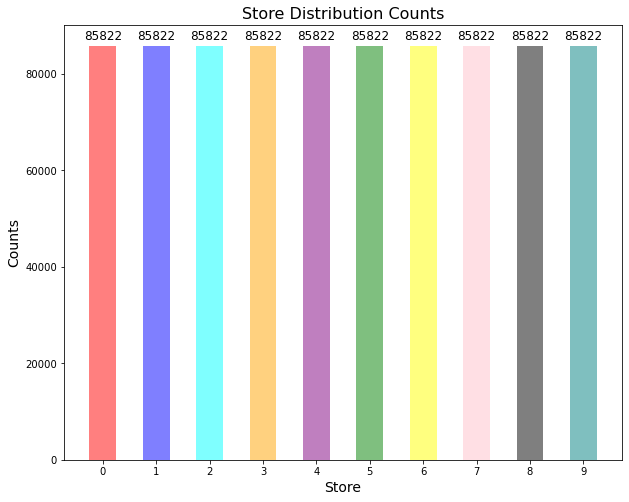

In [11]:
df_store = df[['store']].value_counts()
df_store = pd.pivot_table(df_store.to_frame(), values=0, index=[0,1,2,3,4,5,6,7,8,9], aggfunc=np.sum)
df_store = df_store.reset_index()
df_store  = df_store.rename(columns={'index':'store', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(10)
width = 0.5
# sns.barplot(data=df_store, x='store', y='Counts')
bar = ax.bar(x, df_store['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Store Distribution Counts', fontsize=16)
ax.set_xlabel('Store', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

autolabel(bar)

plt.show()

In [12]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)

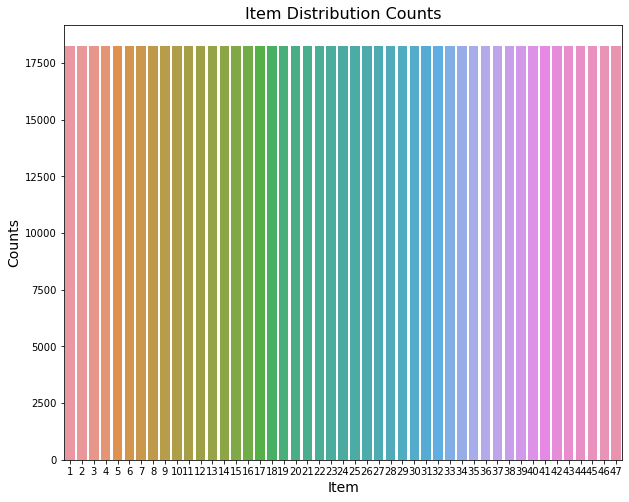

In [13]:
df_item = df[['item']].value_counts()
df_item = pd.pivot_table(df_item.to_frame(), values=0, index=np.arange(1,48), aggfunc=np.sum)
df_item = df_item.reset_index()
df_item  = df_item.rename(columns={'index':'item', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(47)
width = 0.5
sns.barplot(data=df_item, x='item', y='Counts')
# bar = ax.bar(x, df_item['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Item Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

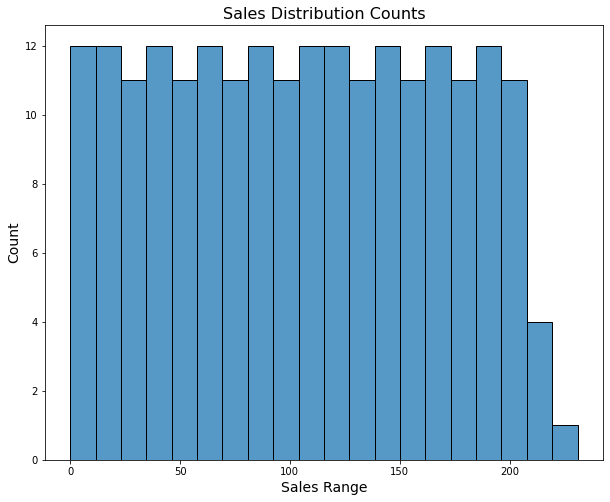

In [14]:
df_sales = df[['sales']].value_counts()
df_sales = df_sales.reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df_sales, x='sales', bins=20, ax=ax)

ax.set_title('Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Sales Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [15]:
import datetime

days = []
months = []
years = []
for d in df['date']:
    date_split = d.split('/')
    days.append(date_split[1])
    months.append(date_split[0])
    years.append(date_split[2])
    
df['day'] = days
df['month'] = months
df['year'] = years

In [16]:
df.head()

,date,store,item,sales,day,month,year
0,1/1/13,1,1,13.0,1,1,13
1,1/2/13,1,1,11.0,2,1,13
2,1/3/13,1,1,14.0,3,1,13
3,1/4/13,1,1,13.0,4,1,13
4,1/5/13,1,1,10.0,5,1,13


In [17]:
yearly_sales = []
for y in df['year'].unique():
    yearly_sales.append(df.loc[df['year'] == y, 'sales'].sum())
    
df_yearly_sales = pd.DataFrame({'year': df['year'].unique(), 'total_sales': yearly_sales})
df_yearly_sales

,year,total_sales
0,13,7427851.0
1,14,8543795.0
2,15,8960093.0
3,16,9729859.0
4,17,10090266.0


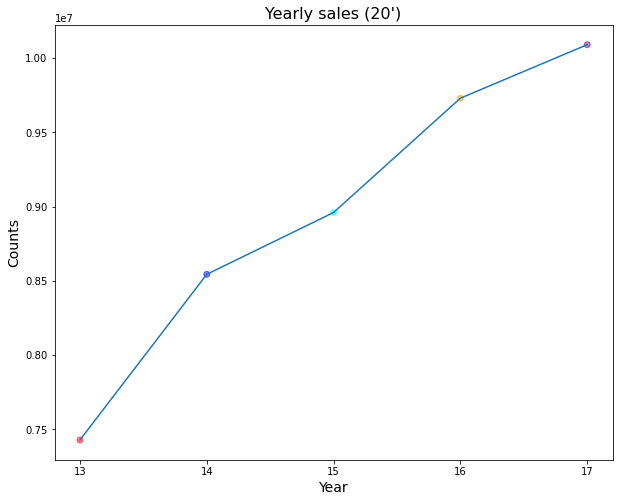

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['year'].unique()
width = 0.5
sns.lineplot(data=df_yearly_sales, x='year', y='total_sales')
bar = ax.scatter(x, df_yearly_sales['total_sales'], c=['red','blue','cyan','orange','purple'], alpha=.5)

ax.set_title("Yearly sales (20')", fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

In [19]:
monthly_sales = []
for m in df['month'].unique():
    monthly_sales.append(df.loc[df['month'] == m, 'sales'].sum())
    
df_monthly_sales = pd.DataFrame({'month': df['month'].unique(), 'total_sales': monthly_sales})
df_monthly_sales

,month,total_sales
0,1,2583278.0
1,2,2603956.0
2,3,3438432.0
3,4,3879630.0
4,5,4298154.0
5,6,4433301.0
6,7,4870368.0
7,8,4295726.0
8,9,3874209.0
9,10,3723728.0


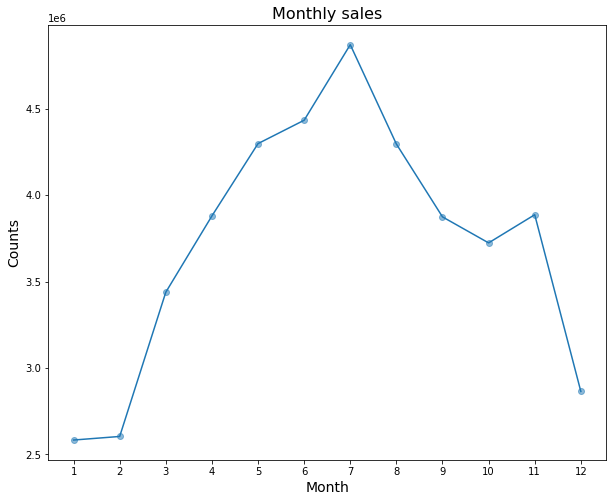

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['month'].unique()

sns.lineplot(data=df_monthly_sales, x='month', y='total_sales')
bar = ax.scatter(x, df_monthly_sales['total_sales'], alpha=.5)

ax.set_title("Monthly sales", fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

In [21]:
overall_item_sales = []
for i in df['item'].unique():
    overall_item_sales.append(df.loc[df['item'] == i, 'sales'].sum())
    
df_overall_item_sales = pd.DataFrame({'item': df['item'].unique(), 'total_sales': overall_item_sales})
df_overall_item_sales

,item,total_sales
0,1,283011.0
1,2,1069564.0
2,3,669087.0
3,4,401907.0
4,5,335230.0
5,6,1068281.0
6,7,1068777.0
7,8,1405108.0
8,9,938379.0
9,10,1337133.0


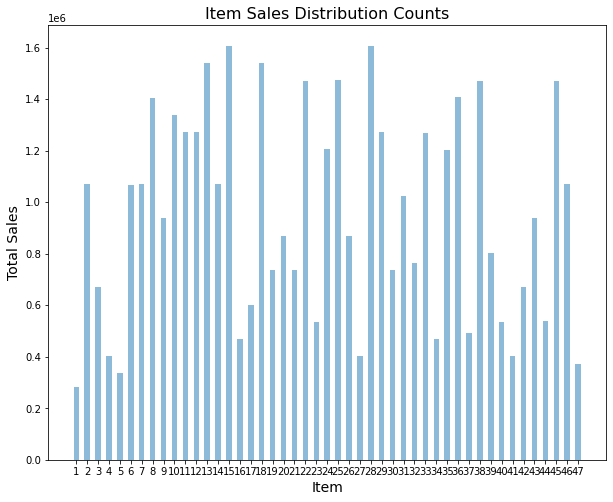

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
x = df['item'].unique()
width = 0.5
bar = ax.bar(x, df_overall_item_sales['total_sales'], alpha=.5, width=width)

ax.set_title('Item Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

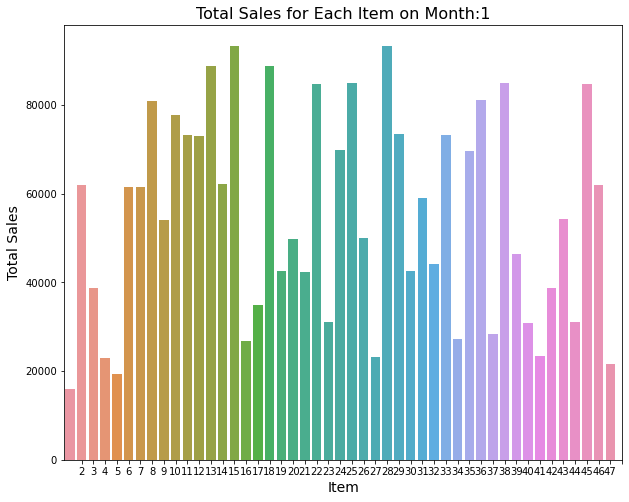

In [23]:
df_item_sales_month = df[['item', 'sales', 'month']]
df_item_sales_month = df_item_sales_month.groupby(by=['month', 'item']).sum()
df_item_sales_month = df_item_sales_month.reset_index()

month_idx = 1
fig, ax = plt.subplots(figsize=(10,8))
df_temp = df_item_sales_month[df_item_sales_month['month'] == str(month_idx)]
sns.barplot(data=df_temp, x='item', y='sales')

ax.set_title('Total Sales for Each Item on Month:{}'.format(month_idx), fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

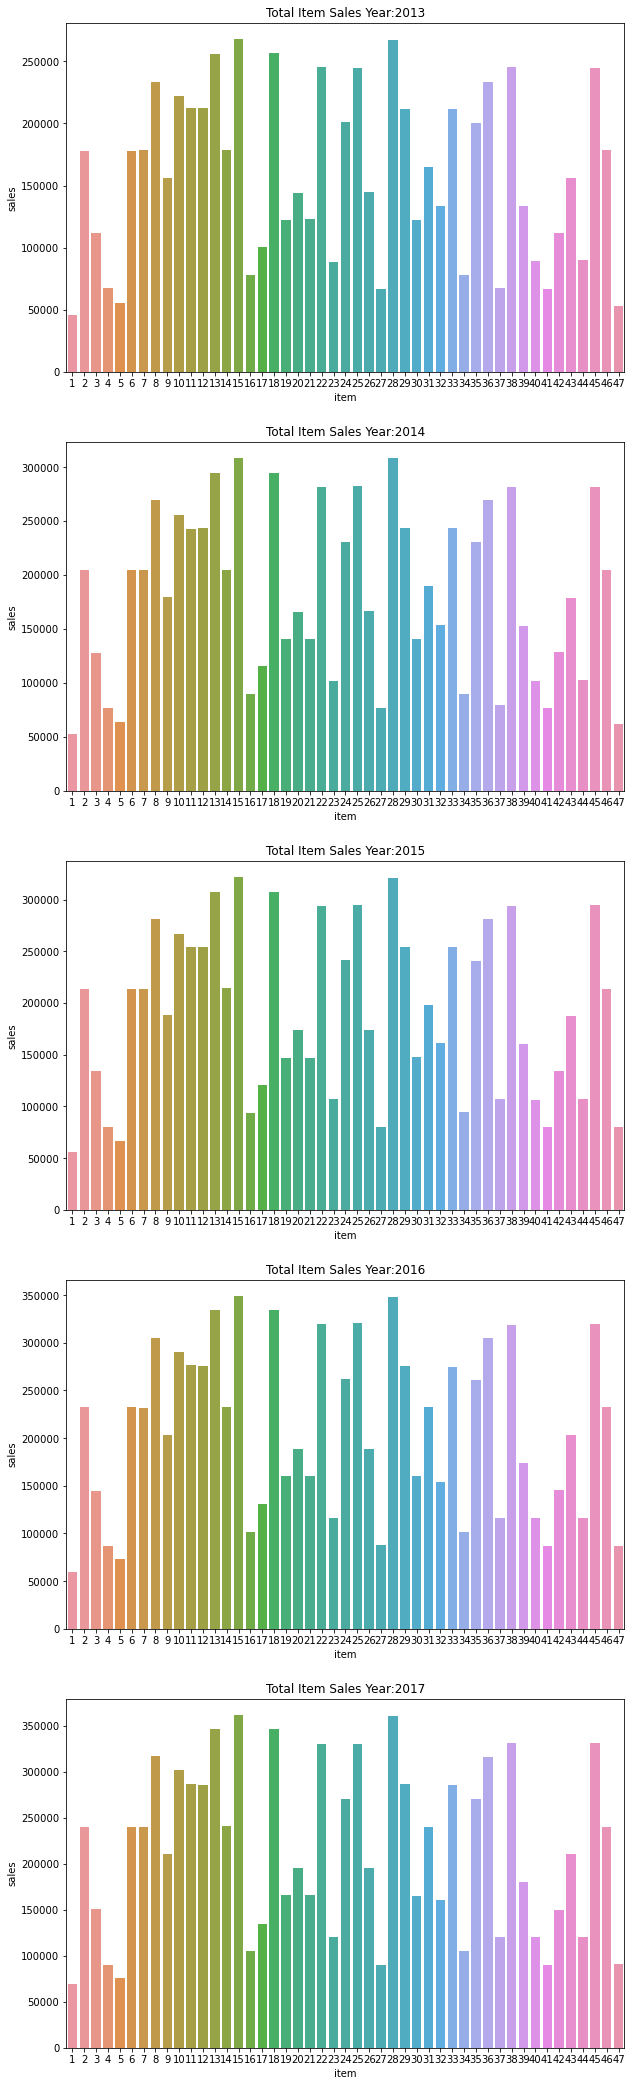

In [24]:
df_item_sales_year = df[['item', 'sales', 'year']]
df_item_sales_year = df_item_sales_year.groupby(by=['year', 'item']).sum()
df_item_sales_year = df_item_sales_year.reset_index()

years = df_item_sales_year['year'].unique()
nrows = 5
ncols = 1
cnt = 1

fig = plt.figure(figsize=(10,15))
for i in years:
    plt.subplot(nrows, ncols, cnt)
    plt.title('Total Item Sales Year:20{}'.format(i))
    plt.xlabel('item')
    sns.barplot(x='item', y='sales', data=df_item_sales_year[df_item_sales_year['year']==i])
    cnt = cnt + 1

plt.subplots_adjust(top=2)
plt.show()

# Building Forecasting Model

In [41]:
import datetime

df_copy = raw_data.copy()

sales_avg = df_copy['sales'].mean()
df_copy = df_copy.fillna(value=sales_avg, axis=1)

df_copy['Date'] = pd.to_datetime(df_copy['date'])
df_copy['Date'] = df_copy['Date'].dt.strftime('%m-%d-%Y')

In [42]:
df_copy.head()

,date,store,item,sales,Date
0,1/1/13,1,1,13.0,01-01-2013
1,1/2/13,1,1,11.0,01-02-2013
2,1/3/13,1,1,14.0,01-03-2013
3,1/4/13,1,1,13.0,01-04-2013
4,1/5/13,1,1,10.0,01-05-2013


In [ ]:
df_grouped_by_date = df_copy.groupby(by=['Date'],)